                      Unhealthy for Sensitive Groups Days Mean  \
State                                                            
Alabama                                               0.142857   
Alaska                                                1.800000   
Arizona                                               4.307692   
Arkansas                                              0.636364   
California                                            1.702128   
Colorado                                              0.230769   
Connecticut                                           0.000000   
Country Of Mexico                                     2.000000   
Delaware                                              0.000000   
District Of Columbia                                  3.000000   
Florida                                               0.236842   
Georgia                                               0.857143   
Hawaii                                                0.333333   
Idaho     

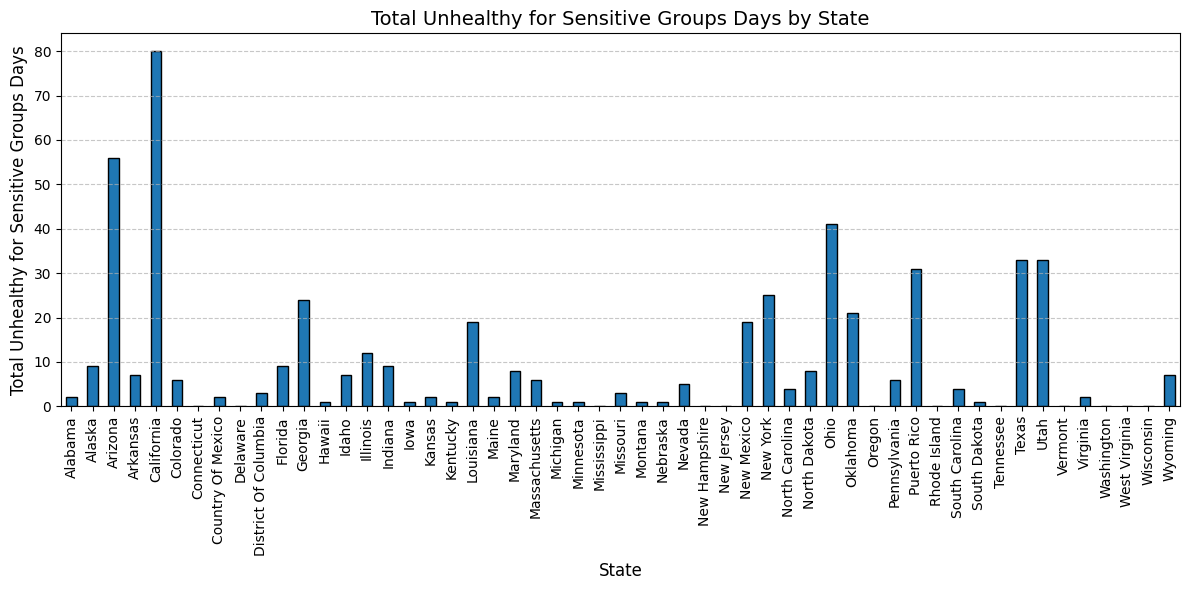

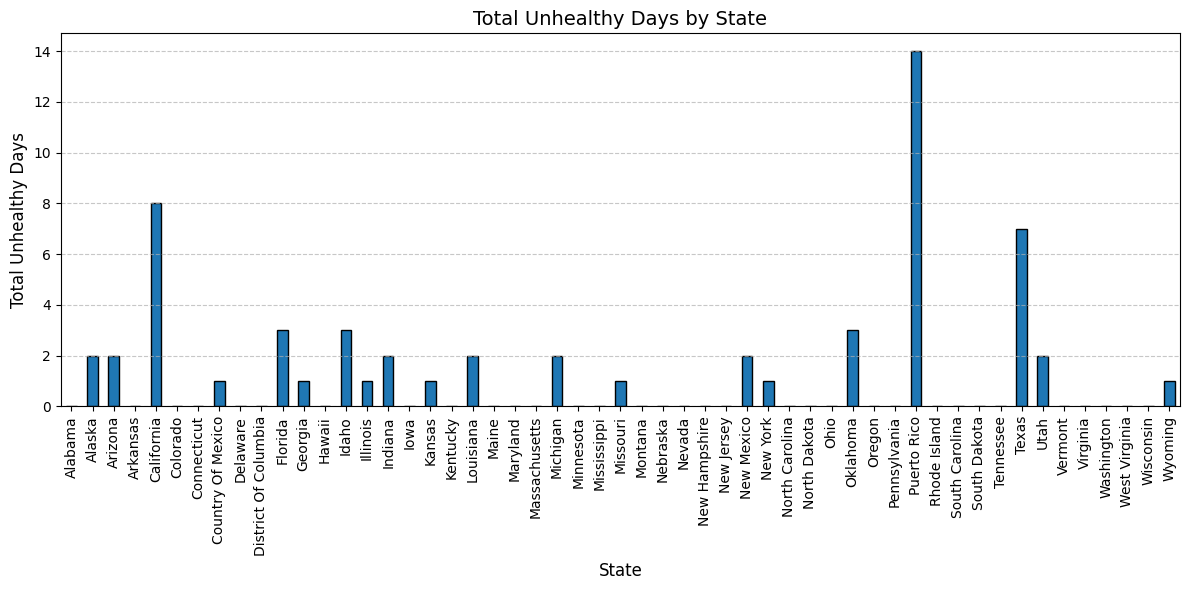

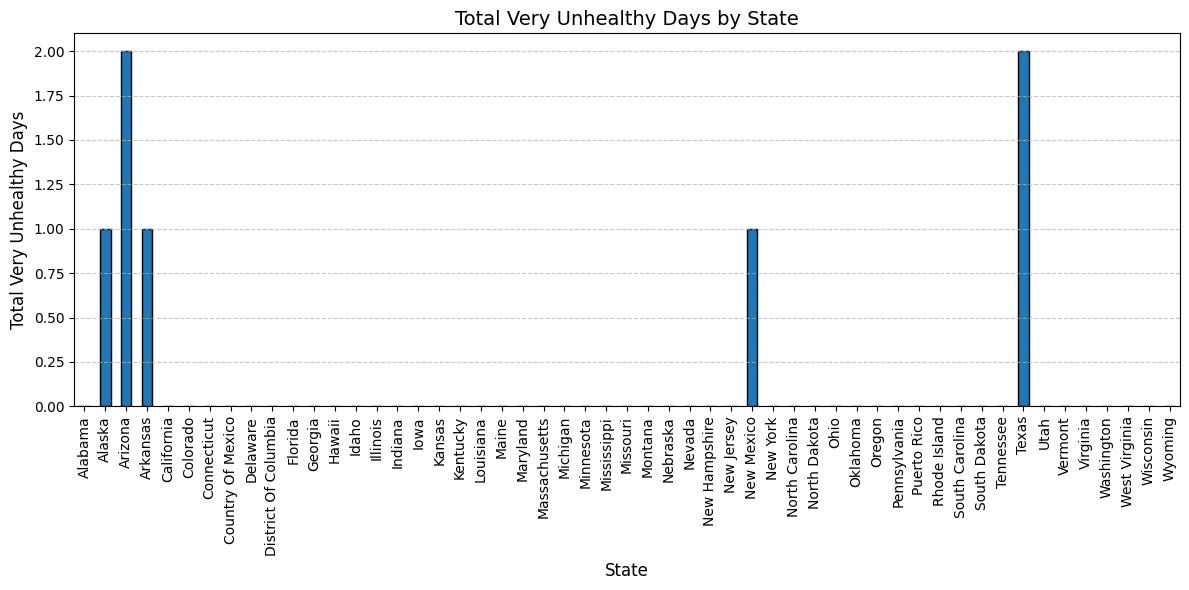

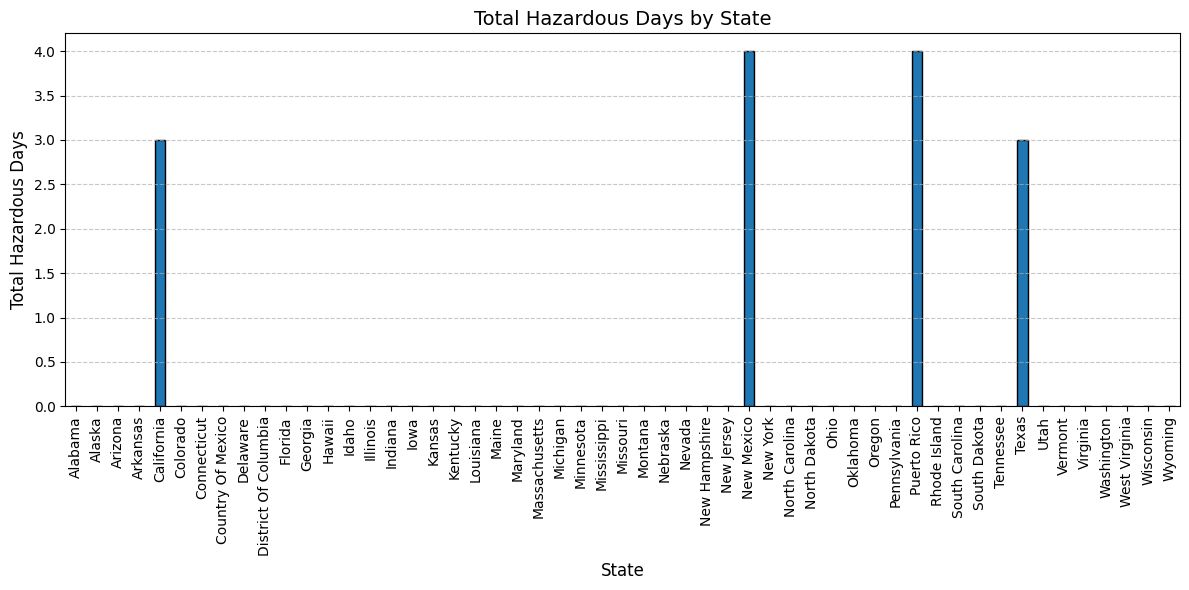

In [13]:
#Data Description
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

file = 'annual_aqi_by_county_2024.csv'
data = pd.read_csv(file)

unhealthy_days = ['Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days']

state_stats = data.groupby('State')[unhealthy_days].agg(['mean', 'std', lambda x: x.mode().iloc[0] if not x.mode().empty else None])

state_stats.columns = [
    f"{col[0]} {col[1].capitalize()}" for col in state_stats.columns
]

print(state_stats)

#Histogram Creation for Total Number of Days at Unhealthy Levels of Each State
state_totals = data.groupby('State')[unhealthy_days].sum()

for i in unhealthy_days:
    plt.figure(figsize=(12, 6))
    state_totals[i].plot(kind='bar', edgecolor='black')
    plt.title(f"Total {i} by State", fontsize=14)
    plt.xlabel("State", fontsize=12)
    plt.ylabel(f"Total {i}", fontsize=12)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [6]:
#
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = 'annual_aqi_by_county_2024.csv'
data = pd.read_csv(file)

unhealthy_days = ['Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days','Hazardous Days']

correlation_analysis = data[unhealthy_days]
    
states = data.groupby('State')[unhealthy_days].sum()

state_results = {
    'Variable': [],
    'Pearson Correlation with State': [],
    'Spearman Correlation with State': []
}

state_codes = {state: idx for idx, state in enumerate(state_totals.index)}
state_totals['State Code'] = state_totals.index.map(state_codes)

for days in unhealthy_days:
    pearson_corr, _ = pearsonr(state_totals['State Code'], state_totals[days])
    spearman_corr, _ = spearmanr(state_totals['State Code'], state_totals[days])
    state_results['Variable'].append(days)
    state_results['Pearson Correlation with State'].append(pearson_corr)
    state_results['Spearman Correlation with State'].append(spearman_corr)


print("State Correlation Coefficients:")
for i in range(len(unhealthy_days)):
    print(f"\nVariable: {state_results['Variable'][i]}")
    print(f"  Pearson Correlation with State: {state_results['Pearson Correlation with State'][i]:.4f}")
    print(f"  Spearman Correlation with State: {state_results['Spearman Correlation with State'][i]:.4f}")


# Linear Regression and Scatter Plots with Regression Lines
unhealthy_days = ['Unhealthy for Sensitive Groups Days','Unhealthy Days', 'Very Unhealthy Days','Hazardous Days']

state_totals = data.groupby('State')[variables_for_analysis].sum()

states = state_totals.index
x = np.arange(len(states)).reshape(-1, 1)  

for i in unhealthy_days:
    y = state_totals[i].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Value', alpha=0.7)
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title(f"States vs {i} with Linear Regression")
    plt.xlabel("States")
    plt.ylabel(i)
    plt.xticks(ticks=np.arange(len(states)), labels=states, rotation=90)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

NameError: name 'state_totals' is not defined

In [3]:
#Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

file = 'annual_aqi_by_county_2024.csv'
data = pd.read_csv(file)

unhealthy_days = ['Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days','Hazardous Days']

state_totals_scaled = StandardScaler().fit_transform(state_totals[unhealthy_days])

pca = PCA(n_components=4)  
pca_results = pca.fit_transform(state_totals_scaled)

pc_weights = pca.components_
ratio = pca.explained_variance_ratio_

for i, component in enumerate(pc_weights, start=1):
    plt.figure(figsize=(8, 6))
    plt.bar(variables_for_analysis, component, color='blue', edgecolor='black')
    plt.title(f"PC{i} Weights" )
    plt.xlabel("Unhealthy Days")
    plt.ylabel("Weight")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(
    pca_results[:, 0], pca_results[:, 1], 
)
plt.title("PC1 vs PC2")
plt.xlabel("PCX")
plt.ylabel("PCY")
plt.grid(alpha=0.5)
plt.show()

NameError: name 'state_totals' is not defined